<a href="https://colab.research.google.com/github/wegnerj/projects-for-students/blob/master/Going_Further_Extension_of_W2D2_Measurement_Using_CERN_Open_Data_Worked_Out_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

# Get Some Data ... **This Example Uses Data From 2010 Record 700**

Choose a data set to use from [CERN Open Data](https://opendata.cern.ch/).

Tips for choosing a data set:

- click the 'datasets' link
- filter for ... ? (What were we looking at in ispy again?)
- right click on the download button, copy link address, and add it into the line below.
- Take a look at your data so you can make a plan.

In [50]:
# a hashtag tells the program "don't read the rest of the line"
# The next line pulls in the dataset from a file with comma seperated values (csv)
# The dataset is then put into a DataFrame called "data" using the pd.read function.
# The name of the DataFrame is arbitrary. "data" is just a name that is used often.
data = pd.read_csv('https://opendata.cern.ch/record/700/files/MuRun2010B.csv')

## Get to know your data ...

It is often a good practice to take a sneak peak at your data to get an idea of what you're working with.

The following code blocks contain some common commands for exploring your data and discovering properties about it.

In [51]:
# The .head(n) command displays the first n rows of a file.
data.head(5)

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,146436,90830792,G,19.17120,3.817130,9.04323,-16.46730,9.81583,-1.289420,1.171390,1,T,5.43984,-0.362592,2.626990,-4.748490,2.65189,-1.345870,1.707960,1,2.73205
1,146436,90862225,G,12.94350,5.125790,-3.98369,-11.19730,6.49180,-1.313350,-0.660674,-1,G,11.86360,4.789840,-6.262220,-8.864340,7.88403,-0.966622,-0.917841,1,3.10256
2,146436,90644850,G,12.39990,-0.849742,9.40110,8.04015,9.43943,0.772580,1.660940,1,G,8.55532,-4.851550,6.976960,-0.983229,8.49797,-0.115445,2.178410,-1,9.41149
3,146436,90678594,G,17.81320,-1.959590,2.80531,17.48110,3.42195,2.333500,2.180530,1,G,9.42174,4.365230,0.168017,8.347130,4.36846,1.403000,0.038471,1,7.74702
4,146436,90686690,G,7.95664,7.097000,-1.31646,3.34613,7.21806,0.448399,-0.183411,1,T,5.44467,-1.341760,1.386470,5.090250,1.92941,1.697380,2.339810,-1,8.67727


In [52]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(100000, 21)

In [53]:
# The .types command displays data types.
data.dtypes

Run        int64
Event      int64
Type1     object
E1       float64
px1      float64
py1      float64
pz1      float64
pt1      float64
eta1     float64
phi1     float64
Q1         int64
Type2     object
E2       float64
px2      float64
py2      float64
pz2      float64
pt2      float64
eta2     float64
phi2     float64
Q2         int64
M        float64
dtype: object

In [54]:
# The .keys command displays the column names.
data.keys()

Index(['Run', 'Event', 'Type1', 'E1', 'px1 ', 'py1', 'pz1', 'pt1', 'eta1',
       'phi1', 'Q1', 'Type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2',
       'Q2', 'M'],
      dtype='object')

In [55]:
# The .describe command displays the dataset statistics
data.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,147955.518910,3.600568e+08,17.665188,-0.061691,-0.197864,-0.834725,7.521848,-0.116067,-0.039216,0.022640,9.200238,-0.012066,0.196614,0.804217,4.968886,0.106296,0.029453,-0.001960,10.092143
std,1009.016673,3.425911e+08,22.474517,7.186708,7.229930,26.692576,6.883665,1.511516,1.824423,0.999749,20.470750,7.641683,6.524565,20.050790,8.735779,1.404998,1.814451,1.000003,9.984072
min,146428.000000,4.982000e+03,2.703340,-221.622000,-313.942000,-2158.810000,1.001750,-2.611640,-3.141570,-1.000000,2.506870,-1501.300000,-105.613000,-1232.880000,0.563436,-2.615690,-3.141590,-1.000000,2.000030
25%,146807.000000,1.047934e+08,8.446880,-3.599162,-3.645665,-11.030350,3.927078,-1.527967,-1.626850,-1.000000,4.794437,-2.239950,-2.124545,-4.230577,2.048237,-1.099540,-1.538377,-1.000000,3.138270
50%,148058.000000,2.547149e+08,12.585600,-0.060634,-0.156428,-2.082375,5.615290,-0.277083,-0.063298,1.000000,6.641075,-0.014198,0.056748,0.956394,4.076730,0.168187,0.044331,-1.000000,7.852410
75%,148864.000000,4.972217e+08,20.417300,3.473033,3.411145,9.631530,9.397340,1.383780,1.530945,1.000000,10.052200,2.260152,2.353935,5.379317,5.763505,1.393425,1.611265,1.000000,13.152400
max,149294.000000,1.776807e+09,3384.430000,593.661000,385.344000,3309.590000,707.759000,2.566250,3.141570,1.000000,4346.030000,750.348000,1003.490000,4251.780000,1805.790000,2.711330,3.141560,1.000000,109.977000


Although not strictly necessary, it may be helpful to see histograms of the data as well. 

To practice that skill, make a new code block below and make a multi-figure plot to make a histogram of at least 12 of the most relevant columns.

(If you run into problems, double check the names of the columns in the ".keys" code block. Every now and then there is a space in the column name that can be irritating.)

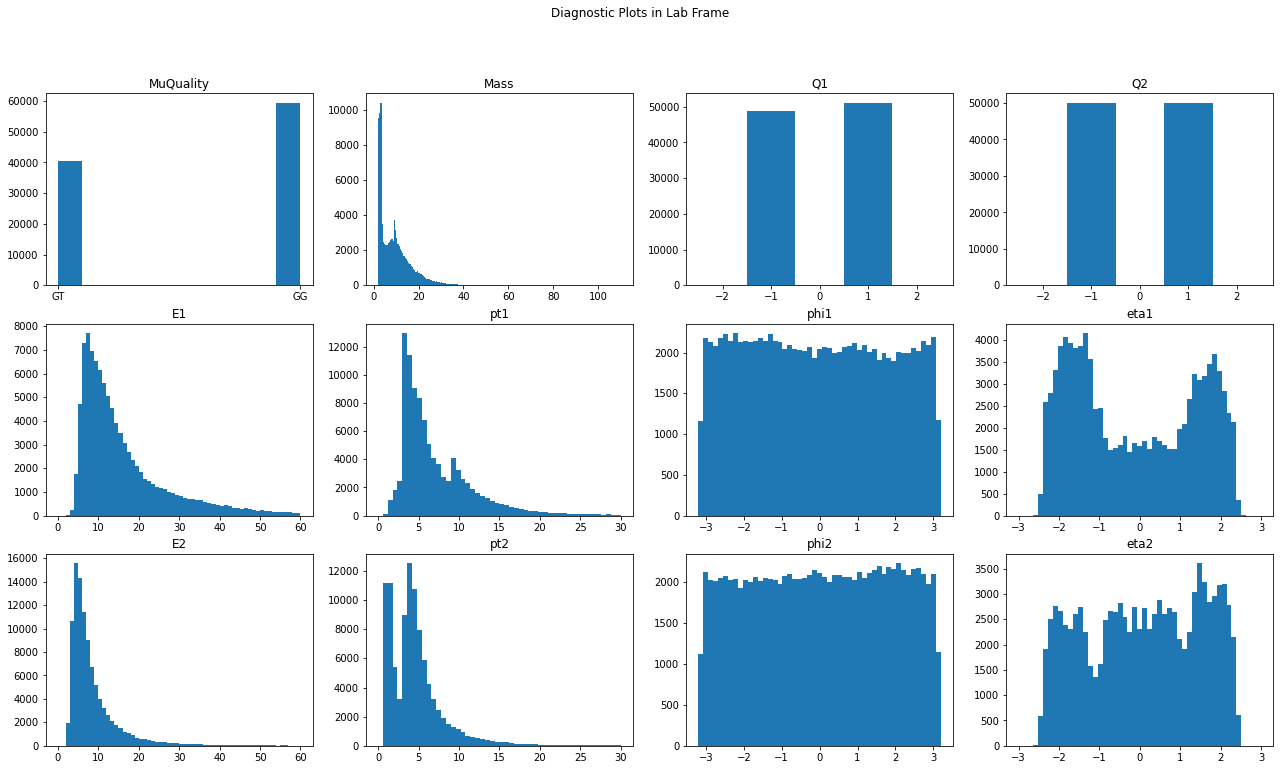

In [56]:
# All of the code in this block is to create a multi histogram figure showing the imported data

data['MuQuality']=data.Type1+data.Type2 #make a column combining data types


# set the range of the x-axis and set the number of bins
xE = np.linspace(0, 60, num=61) # splits the range from 0 to 60 into 61 values
xP = np.linspace(0, 30, num=51) # splits the range from -25 to 25 into 51 values
xQ = np.linspace(-2.5, 2.5, num=6) # splits the range from -2.5 to 2.5 into 6 values. Why? There's a reason ...
xA = np.linspace(-3.2,3.2,num=50)
xT = np.linspace(-3,3,num=50)

# create and size the figure
fig1 = plt.figure(figsize = [22, 12])
fig1.suptitle('Diagnostic Plots in Lab Frame')

# First subplot of the Muon Quality
MuQualityPlot = plt.subplot(3,4, 1) # 3 rows, 4 cols, subplot 1
plt.hist(data.MuQuality) # data type is 'object' so no range or number of bins defined
MuQualityPlot.title.set_text('MuQuality')

# Second subplot of the Event Nimber
MassPlot = plt.subplot(3,4, 2) # 3 rows, 4 cols, subplot 2
plt.hist(data.M, bins=201) # bins defined on this line
MassPlot.title.set_text('Mass')

# Third subplot of the Charge of Muon 1 (Q1)
Q1Plot = plt.subplot(3,4, 3) # 3 rows, 4 cols, subplot 3
plt.hist(data.Q1, xQ) # bins defined above
Q1Plot.title.set_text('Q1');

# Fourth subplot of the Charge of Muon 2 (Q2)
Q2Plot = plt.subplot(3,4, 4) # 3 rows, 4 cols, subplot 4
plt.hist(data.Q2, xQ)
Q2Plot.title.set_text('Q2');

# Fifth subplot of the energy of muon 1 (E1)
E1Plot = plt.subplot(3,4, 5) # 3 rows, 4 cols, subplot 5
plt.hist(data.E1, xE)
E1Plot.title.set_text('E1')

# Sixth subplot of the transverse momentum of muon 1 (pt1)
pt1Plot = plt.subplot(3,4, 6) # 3 rows, 4 cols, subplot 6
plt.hist(data['pt1'], xP)
pt1Plot.title.set_text('pt1')

# Seventh subplot of the angle in the x-y plane of muon 1 (phi1)
phi1Plot = plt.subplot(3,4, 7) # 3 rows, 4 cols, subplot 7
plt.hist(data.phi1, xA)
phi1Plot.title.set_text('phi1');

# Eighth subplot of the psuedorapidity of muon 1 (eta1)
eta1Plot = plt.subplot(3,4, 8) # 3 rows, 4 cols, subplot 8
plt.hist(data.eta1, xT)
eta1Plot.title.set_text('eta1');


# Ninth subplot of the energy of muon 2 (E2)
E2Plot = plt.subplot(3,4, 9) # 3 rows, 4 cols, subplot 9
plt.hist(data.E2, xE)
E2Plot.title.set_text('E2')

# Tenth subplot of the transverse momentum of muon 2 (pt2)
pt2Plot = plt.subplot(3,4, 10) # 3 rows, 4 cols, subplot 10
plt.hist(data.pt2, xP)
pt2Plot.title.set_text('pt2')

# Eleventh subplot of the angle in the x-y plane of muon 2 (phi2)
phi2Plot = plt.subplot(3,4, 11) # 3 rows, 4 cols, subplot 11
plt.hist(data.phi2, xA)
phi2Plot.title.set_text('phi2');

# Twelfth subplot of the psuedorapidity of muon 2 (eta2)
eta2Plot = plt.subplot(3,4, 12) # 3 rows, 4 cols, subplot 12
plt.hist(data.eta2, xT)
eta2Plot.title.set_text('eta2');

## Psuedocode

What do we want? 
- What is the end result of the W2D2 masterclass?

How do we get there?
- What information are we starting with?
- How do we use this data to get the thing we want?

After answering these questions on your own, add some code blocks below to histogram the larger dataset you pulled from the CERN Open Data page and compare it to the few events you worked out "by hand".


In [57]:
len(data) #get the length of the dataset

100000

In [58]:
dphi = pd.DataFrame(columns=['dphi_raw','dphi_rad','dphi_deg'])

dphi['dphi_raw'] = np.abs(data.phi1 - data.phi2)

for ie in range(0,len(data)):
  if dphi.at[ie,'dphi_raw'] > np.pi:
    dphi.at[ie,'dphi_rad'] = 2*np.pi - dphi.at[ie,'dphi_raw']
  else:
    dphi.at[ie,'dphi_rad'] = dphi.at[ie,'dphi_raw']

dphi['dphi_deg'] = dphi['dphi_rad']*180/np.pi

dphi.head(15)


,dphi_raw,dphi_rad,dphi_deg
0,0.536570,0.53657,30.7432
1,0.257167,0.257167,14.7346
2,0.517470,0.51747,29.6488
3,2.142059,2.14206,122.731
4,2.523221,2.52322,144.57
5,0.043590,0.04359,2.49752
6,2.247445,2.24744,128.769
7,1.153410,1.15341,66.0855
8,0.565350,0.56535,32.3922
9,1.576343,1.57634,90.3178


In [59]:
phi = pd.DataFrame.copy(data['phi1'])
phi = phi.append(data['phi2'])
phi = phi*180/np.pi
phi.head(5)

0     67.115703
1    -37.853832
2     95.164852
3    124.935166
4    -10.508676
dtype: float64

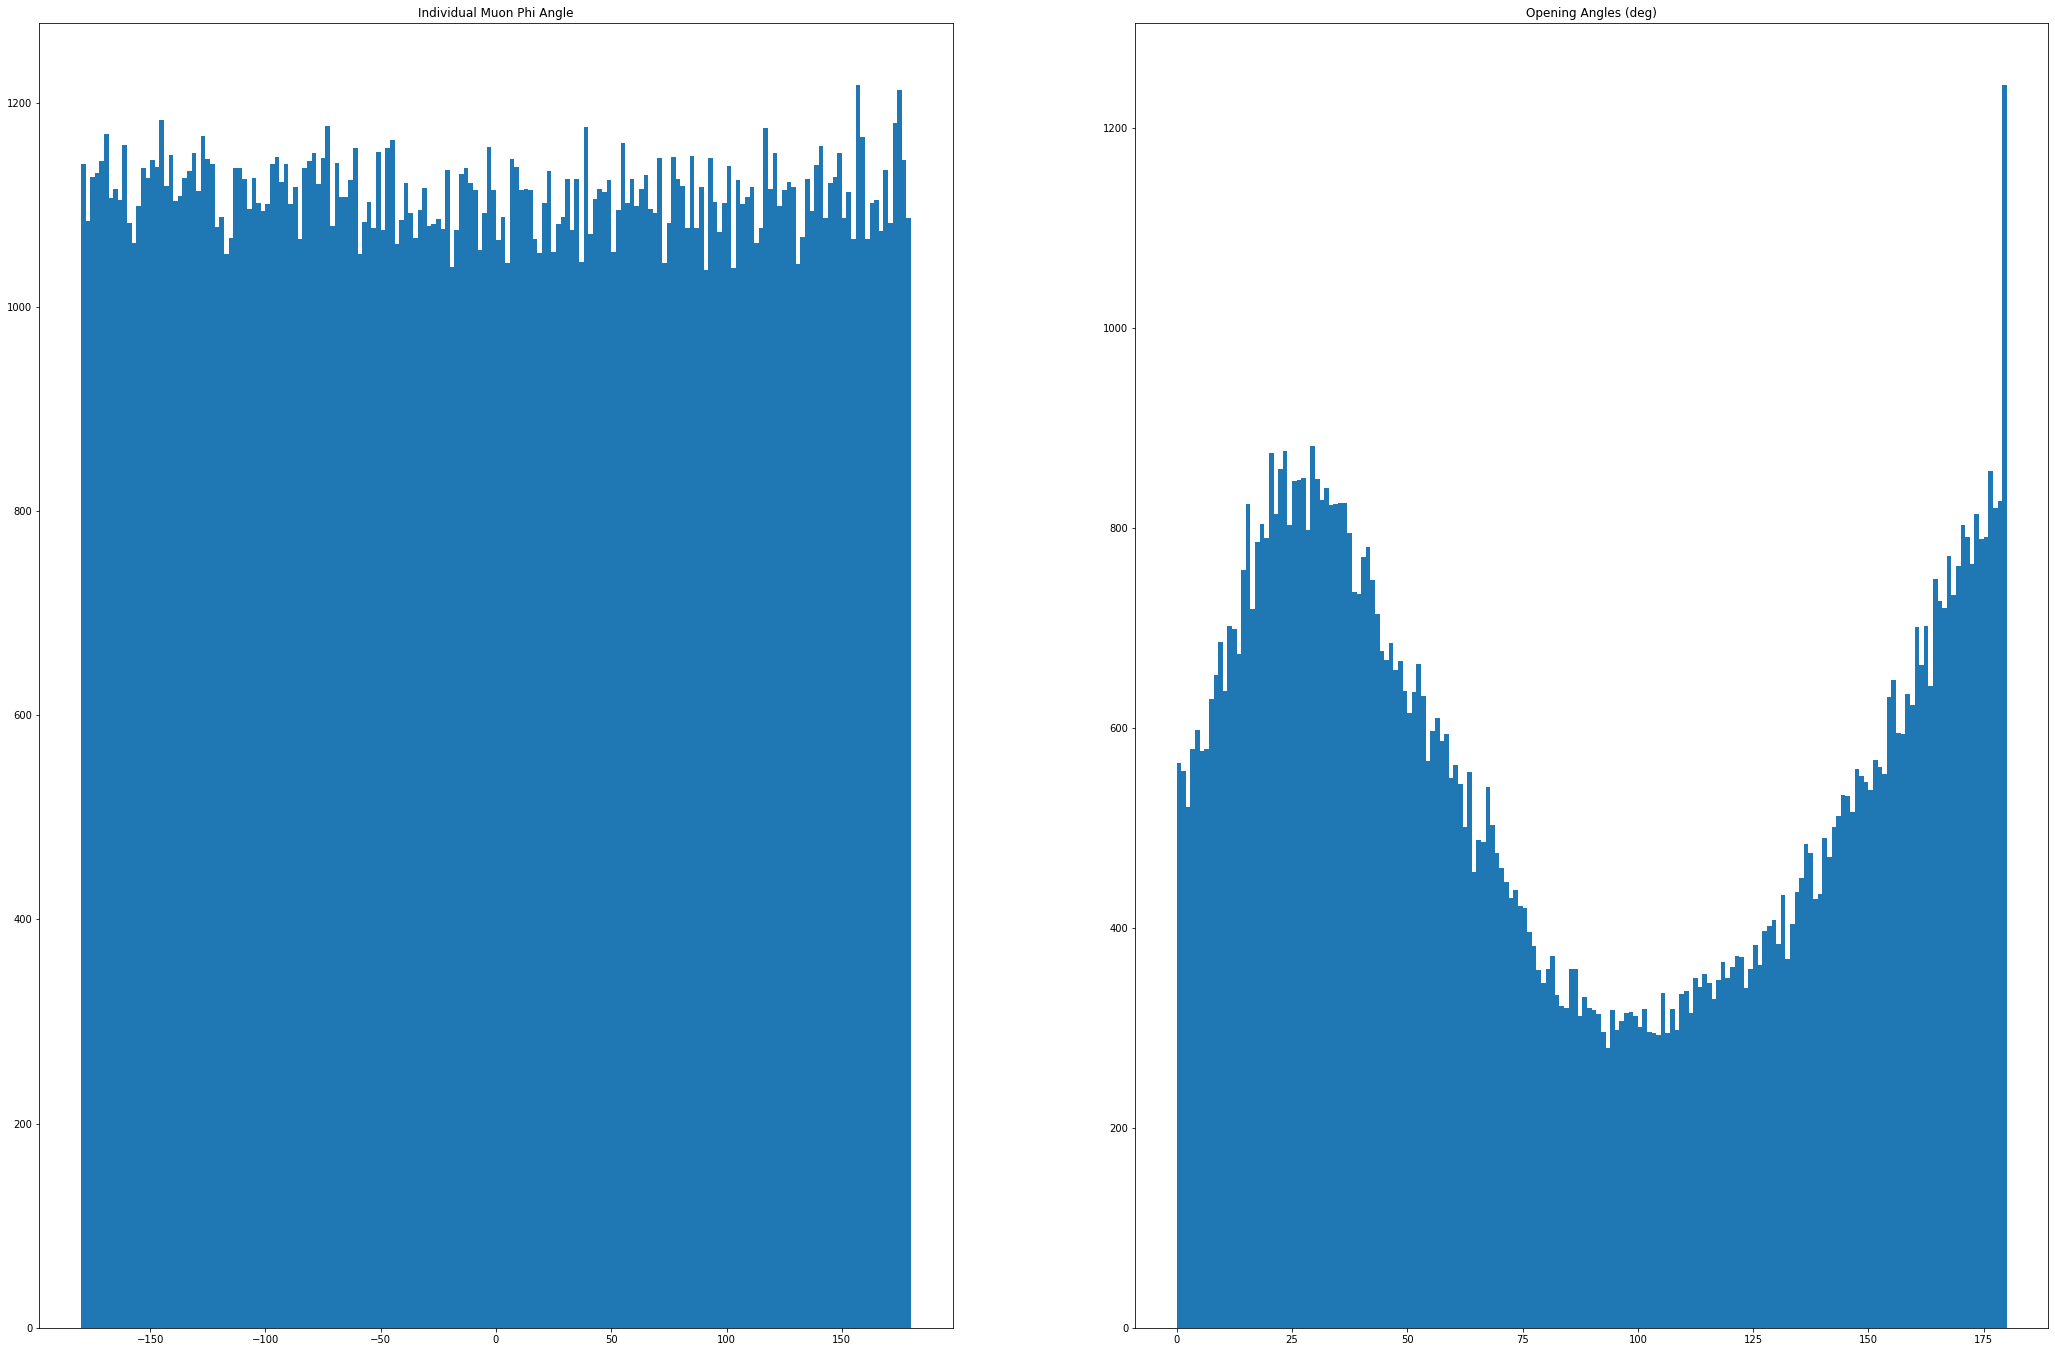

In [60]:
fig2 = plt.figure(figsize = [36, 24])

# First subplot of sys.E
phiPlot = plt.subplot(1,2, 1) # 1 row, 2 cols, subplot 1
plt.hist(phi,bins=180, range=(-180,180))
phiPlot.title.set_text('Individual Muon Phi Angle')

# Second subplot of sys.P
dphiPlot = plt.subplot(1,2, 2) # 1 row, 4 cols, subplot 2
plt.hist(dphi['dphi_deg'], bins=180, range=(0,180))
dphiPlot.title.set_text('Opening Angles (deg)')

# Reflection and Review

- What problems did you run into when writing your code?
- How did the histogram of the larger data set compare to the smaller one from the masterclass?
- Did you make any cuts in the data you analyzed to be sure that the muons were opposite sign and were of best quality?
- What conclusions, if any, can you infer from your histograms? Can you include any supporting evidence from the dataset? Can you display that supporting evidence graphically?

# Going Even Further, an Extension on the Extension

- If you didn't make any cuts for charge or quality, do them below.
- Make a comparison of opening angle and mass. Is there a relationship?
- Are there any other relationships that should be explored?

In [61]:
dphi['opp'] = data.Q1*data.Q2
dphi['MuQuality']=data.MuQuality
dphi['Mass']=data.M
dphi.head(5)

,dphi_raw,dphi_rad,dphi_deg,opp,MuQuality,Mass
0,0.536570,0.53657,30.7432,1,GT,2.73205
1,0.257167,0.257167,14.7346,-1,GG,3.10256
2,0.517470,0.51747,29.6488,-1,GG,9.41149
3,2.142059,2.14206,122.731,1,GG,7.74702
4,2.523221,2.52322,144.57,-1,GT,8.67727


In [62]:
dphi_opp = dphi[dphi['opp']<0]

dphi_cut = dphi_opp[dphi_opp['MuQuality']=='GG']

dphi_cut.head(5)

,dphi_raw,dphi_rad,dphi_deg,opp,MuQuality,Mass
1,0.257167,0.257167,14.7346,-1,GG,3.10256
2,0.517470,0.51747,29.6488,-1,GG,9.41149
5,0.043590,0.04359,2.49752,-1,GG,2.30104
7,1.153410,1.15341,66.0855,-1,GG,4.14828
8,0.565350,0.56535,32.3922,-1,GG,3.13180


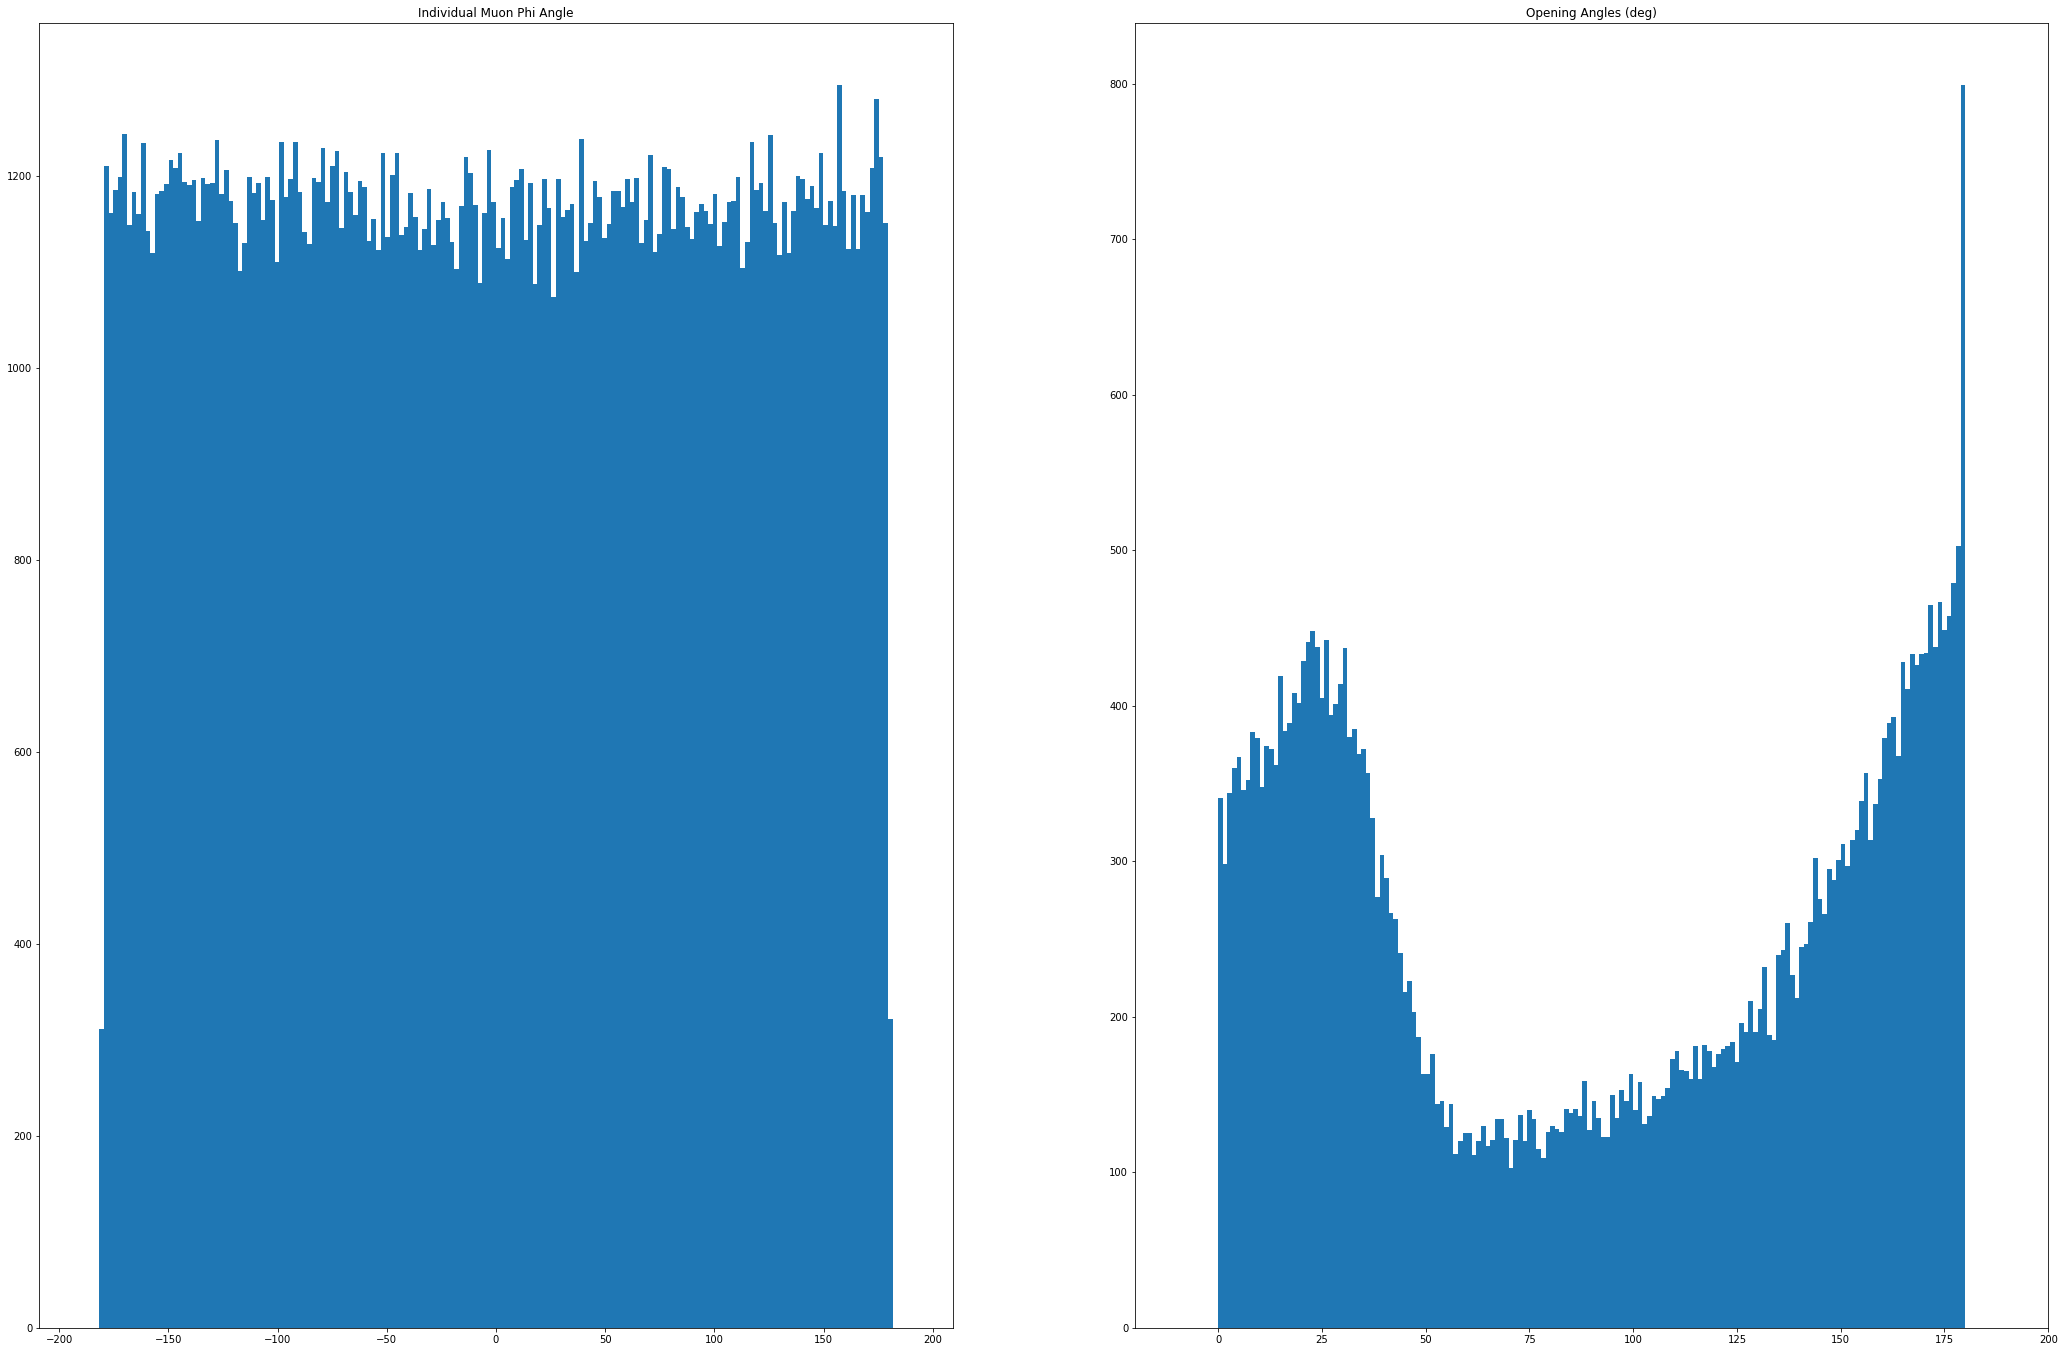

In [64]:
fig3 = plt.figure(figsize = [36, 24])

# First subplot of sys.E
phiPlot2 = plt.subplot(1,2, 1) # 1 row, 2 cols, subplot 1
plt.hist(phi,bins=180, range=(-190,190))
phiPlot2.title.set_text('Individual Muon Phi Angle')

# Second subplot of sys.P
dphiPlot2 = plt.subplot(1,2, 2) # 1 row, 4 cols, subplot 2
plt.hist(dphi_cut['dphi_deg'], bins=180, range=(-10,190))
dphiPlot2.title.set_text('Opening Angles (deg)')

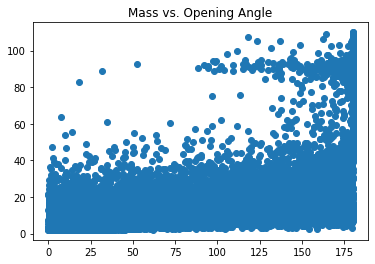

In [65]:
# comparing angle and mass
Mass_Angle_Plot2 = plt.scatter(dphi_cut.dphi_deg,dphi_cut.Mass);
plt.title('Mass vs. Opening Angle');

In [66]:
high_angle = dphi_cut[dphi_cut['dphi_deg']>179]

high_angle.shape

(764, 6)

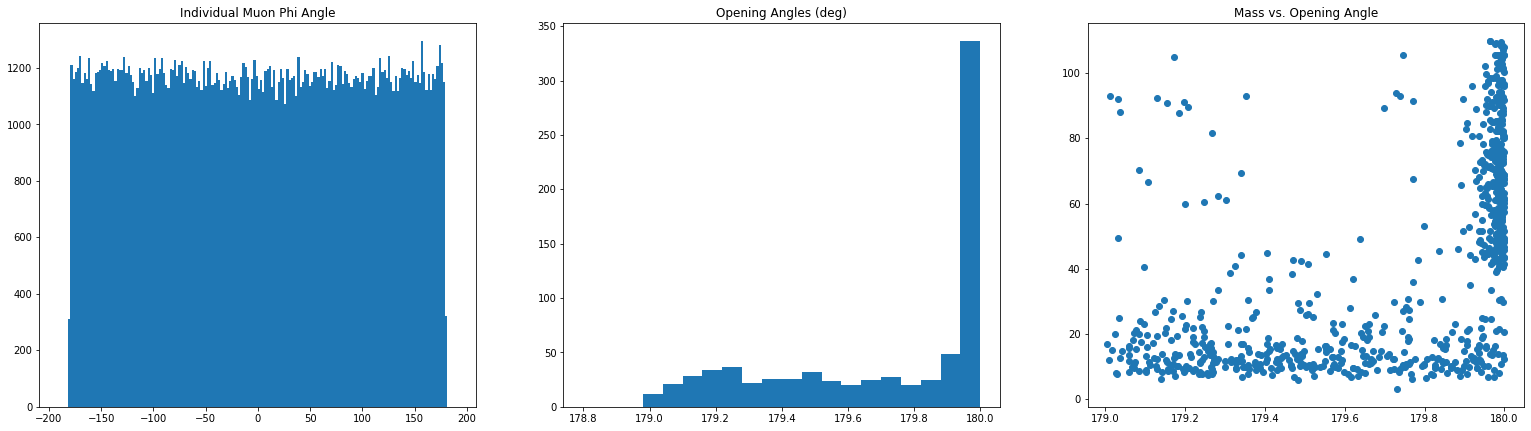

In [68]:
fig3 = plt.figure(figsize = [36, 24])

# First subplot of sys.E
phiPlot2 = plt.subplot(3,4, 1) # 1 row, 4 cols, subplot 1
plt.hist(phi,bins=180, range=(-190,190))
phiPlot2.title.set_text('Individual Muon Phi Angle')

# Second subplot of sys.P
dphiPlot2 = plt.subplot(3,4, 2) # 1 row, 4 cols, subplot 2
plt.hist(high_angle['dphi_deg'], bins=20, range=(178.8,180))
dphiPlot2.title.set_text('Opening Angles (deg)')

# Third subplot of sys.M
Mass_Angle_Plot2 = plt.subplot(3,4, 3) # 1 row, 4 cols, subplot 3
plt.scatter(high_angle.dphi_deg,high_angle.Mass)
Mass_Angle_Plot2.title.set_text('Mass vs. Opening Angle');